In [1]:
# learning from http://samcarcagno.altervista.org/blog/basic-sound-processing-python/

In [2]:
import pylab
from scipy.io import wavfile

In [3]:
sampFreq, snd = wavfile.read('440_sine.wav')

In [4]:
sampFreq

44100

In [5]:
snd

array([[0, 0],
       [0, 0],
       [0, 0],
       ..., 
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [6]:
#the scipy.io.wavfile.read function reads wav files as int16 (for 16-bit wavs) or int32 (for 32-bit wavs), 24-bit wav files are not supported

In [7]:
#this means that the sound pressure values are mapped to integer values that can range from -2^15 to (2^15)-1

In [8]:
snd.shape

(5292, 2)

In [9]:
# ie two channels 5292 sample points

In [10]:
snd = snd / (2.**15) #converts our sound array to floating point values ranging from -1 to 1

In [11]:
5292.0 / sampFreq # considering the sampling rate (sampFreq = 44110) this corresponds to a duration of 120 ms

0.12

In [12]:
len(snd)

5292

In [13]:
snd[4]

array([ 0.,  0.])

In [14]:
snd[2500]

array([-0.01290894, -0.01290894])

In [15]:
# two values for two channels

In [16]:
s1 = snd[:,0] # work with one channel

In [17]:
#if you’re interested in having sound playback from python check out pyalsaaudio (only Linux) or PyAudio

In [18]:
timeArray = pylab.arange(0, 5292, 1)

In [19]:
timeArray

array([   0,    1,    2, ..., 5289, 5290, 5291])

In [20]:
timeArray = timeArray / float(sampFreq)

In [21]:
timeArray

array([  0.00000000e+00,   2.26757370e-05,   4.53514739e-05, ...,
         1.19931973e-01,   1.19954649e-01,   1.19977324e-01])

In [22]:
timeArray = timeArray * 1000

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

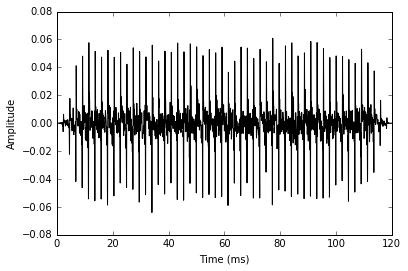

In [24]:
plt.plot(timeArray, s1, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')

In [25]:
#Another useful graphical representation is that of the frequency content, or spectrum of the tone

In [26]:
#obtain the frequency spectrum of the sound using the fft function, that implements a Fast Fourier Transform algorithm

In [27]:
# We’ll follow closely the technical document available https://web.archive.org/web/20120615002031/http://www.mathworks.com/support/tech-notes/1700/1702.html to obtain the power spectrum of our sound.

In [28]:
p = pylab.fft(s1) # take the fourier transform 

In [29]:
p #array of complex numbers

array([-0.33663940+0.j        ,  0.26251154-0.3079739j ,
        0.52259076+0.24347809j, ...,  0.26140157+0.16932575j,
        0.52259076-0.24347809j,  0.26251154+0.3079739j ])

In [30]:
n = len(s1)
n

5292

In [31]:
nUniquePts = int(pylab.ceil((n+1)/2.0)) #ceil give the ceiling of a value i.e the smallest integer larger than that value

In [32]:
nUniquePts #number of unique points 

2647

In [33]:
p = p[0:nUniquePts]
p

array([ -3.36639404e-01 +0.00000000e+00j,
         2.62511545e-01 -3.07973896e-01j,
         5.22590764e-01 +2.43478093e-01j, ...,
         5.57675918e-04 -3.53467288e-04j,
        -2.72537919e-04 -1.35899341e-04j,   5.18798828e-04 -4.40619763e-16j])

In [34]:
p = abs(p)
p

array([  3.36639404e-01,   4.04672994e-01,   5.76526399e-01, ...,
         6.60258702e-04,   3.04541538e-04,   5.18798828e-04])

In [35]:
len(p)

2647

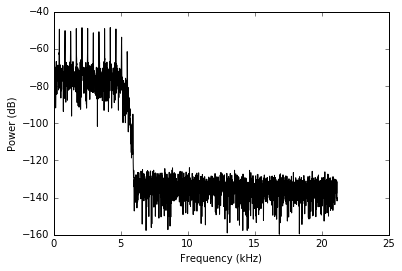

In [36]:
p = p / float(n) # scale by the number of points so that
                 # the magnitude does not depend on the length 
                 # of the signal or on its sampling frequency  
p = p**2  # square it to get the power 

# multiply by two (see technical document for details)
# odd nfft excludes Nyquist point
if n % 2 > 0: # we've got odd number of points fft
    p[1:len(p)] = p[1:len(p)] * 2
else:
    p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

freqArray = pylab.arange(0, nUniquePts, 1.0) * (sampFreq / n);
pylab.plot(freqArray/1000, 10*pylab.log10(p), color='k')
pylab.xlabel('Frequency (kHz)')
pylab.ylabel('Power (dB)')

In [37]:
sampFreq_pianonote, snd_pianonote = wavfile.read('68448__pinkyfinger__piano-g.wav')

In [38]:
sampFreq_pianonote

44100

In [39]:
snd_pianonote

array([[15893, -2626],
       [16801, -2928],
       [16678, -3737],
       ..., 
       [-3060,   810],
       [-3310,   622],
       [-3449,   447]], dtype=int16)

In [40]:
snd_pianonote.shape

(68608, 2)

In [41]:
p1 = snd_pianonote[:,0]
p1

array([15893, 16801, 16678, ..., -3060, -3310, -3449], dtype=int16)

In [42]:
p1 = p1 #/ (2.**15) #?
p1

array([15893, 16801, 16678, ..., -3060, -3310, -3449], dtype=int16)

In [43]:
timeArray = pylab.arange(0, 68608, 1) 
timeArray

array([    0,     1,     2, ..., 68605, 68606, 68607])

In [44]:
timeArray = (timeArray / float(sampFreq)) * 1000

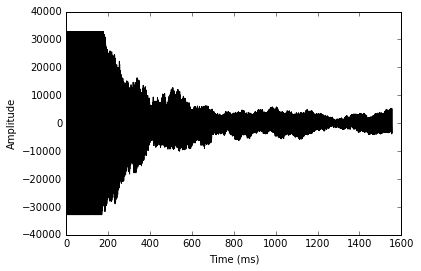

In [45]:
plt.plot(timeArray, p1, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')

In [46]:
fp1 = pylab.fft(p1)

In [47]:
fp1

array([-8212633.00000000      +0.j        ,
       -6853172.97311141+2286848.53259211j,
       -5532689.89191784+4314590.84317032j, ...,
       -3599135.55162322-5381329.84500757j,
       -5532689.89191788-4314590.84317029j,
       -6853172.97311142-2286848.53259206j])

In [48]:
absfp1 = abs(fp1)
absfp1

array([ 8212633.        ,  7224656.11710366,  7016149.34163313, ...,
        6473985.45099751,  7016149.34163314,  7224656.11710366])

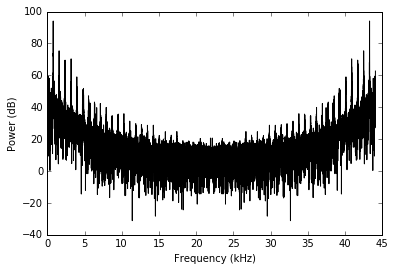

In [49]:
absfp1 = absfp1 / float(n) 
power = absfp1**2  


# if len(power) % 2 > 0: # we've got odd number of points fft
#     power[1:len(power)] = power[1:len(power)] * 2
# else:
#     p[1:len(power) -1] = p[1:len(power) - 1] * 2 # we've got even number of points fft

freqArray = pylab.arange(0, len(power), 1.0) * (sampFreq_pianonote / float(len(power)));
pylab.plot(freqArray/1000, 10*pylab.log10(power), color='k')
pylab.xlabel('Frequency (kHz)')
pylab.ylabel('Power (dB)')

In [50]:
power

array([ 2408380.82414395,  1863780.18112607,  1757753.52748323, ...,
        1496593.19832612,  1757753.52748323,  1863780.18112607])

In [51]:
#http://stackoverflow.com/questions/604453/analyze-audio-using-fast-fourier-transform

In [52]:
#https://www.quora.com/How-does-the-sampling-rate-influence-the-frequency-resolution-in-frequency-spectrum-in-FFT

In [53]:
#http://web.itu.edu.tr/hulyayalcin/Signal_Processing_Books/RichardLyons_Understanding_DSP__2001.pdf